In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification


In [12]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X

array([[ 0.55942643,  2.38869353],
       [ 1.31217492, -0.7173148 ],
       [-1.5598485 , -1.92487377],
       [-2.2813861 , -0.1368559 ],
       [ 1.56070438, -0.42795824],
       [-0.80804463,  1.19664076],
       [-0.27062383, -2.25553963],
       [ 0.480502  ,  0.54914434],
       [-1.20757158, -1.26898369],
       [ 0.25415746, -1.79532002],
       [ 2.59123946,  0.24472415],
       [ 0.07123641,  0.49429823],
       [-1.17762637, -1.20592943],
       [ 0.93343952,  0.68811892],
       [ 1.65214494, -0.35885569],
       [-1.40735658, -1.56826626],
       [ 1.02255619, -1.08324727],
       [-0.81680628, -0.6795874 ],
       [ 1.50575249, -0.38919817],
       [-2.17105282, -0.04862909],
       [ 0.71479373, -1.42922002],
       [-0.15013844, -0.11708689],
       [-1.4117586 , -1.5332749 ],
       [-2.58590856, -0.40925706],
       [ 0.82600732, -1.05383855],
       [-0.07133524,  0.08896214],
       [ 0.6273745 , -1.32933233],
       [ 1.65882246, -0.43131517],
       [ 1.2798899 ,

In [13]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [8]:
# Create AdaBoost classifier with Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)


In [9]:
adaboost.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

ValueError: ignored

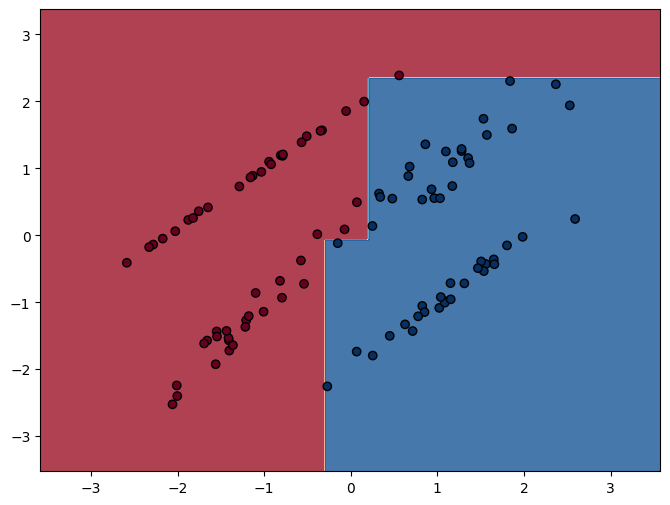

In [11]:
# Create a meshgrid to plot the decision boundaries
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# Make predictions on the meshgrid points
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')

# Plot the sample weights
sample_weights = np.ones_like(y) / len(y)
for tree in adaboost.estimators_:
    sample_weights *= np.exp(adaboost.learning_rate * (y != tree.predict(X)))

plt.scatter(X[:, 0], X[:, 1], s=1000 * sample_weights, alpha=0.1, edgecolors='k', color='blues')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('AdaBoost Decision Boundaries')
plt.show()
